# Capturing Data from snapshots z=0 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py
import hdf5plugin
%matplotlib inline
#%matplotlib notebook

In [28]:
# snapshot name
snapshot = r'C:\CAMELS DATA\LH643_snap_033.hdf5'
# open the catalogue
f = h5py.File(snapshot, 'r')
# looking to see data in cataloge
def print_dataset_name(name,g):
    print(name,'&',g)
f.visititems(print_dataset_name)

Header & <HDF5 group "/Header" (0 members)>
PartType0 & <HDF5 group "/PartType0" (26 members)>
PartType0/CenterOfMass & <HDF5 dataset "CenterOfMass": shape (14814094, 3), type "<f4">
PartType0/Coordinates & <HDF5 dataset "Coordinates": shape (14814094, 3), type "<f8">
PartType0/Density & <HDF5 dataset "Density": shape (14814094,), type "<f4">
PartType0/ElectronAbundance & <HDF5 dataset "ElectronAbundance": shape (14814094,), type "<f4">
PartType0/EnergyDissipation & <HDF5 dataset "EnergyDissipation": shape (14814094,), type "<f4">
PartType0/GFM_AGNRadiation & <HDF5 dataset "GFM_AGNRadiation": shape (14814094,), type "<f4">
PartType0/GFM_CoolingRate & <HDF5 dataset "GFM_CoolingRate": shape (14814094,), type "<f4">
PartType0/GFM_Metallicity & <HDF5 dataset "GFM_Metallicity": shape (14814094,), type "<f4">
PartType0/GFM_Metals & <HDF5 dataset "GFM_Metals": shape (14814094, 10), type "<f4">
PartType0/GFM_MetalsTagged & <HDF5 dataset "GFM_MetalsTagged": shape (14814094, 6), type "<f4">
Part

In [29]:
# read different attributes of the header
BoxSize      = f['Header'].attrs[u'BoxSize']/1e3 #Mpc/h
redshift     = f['Header'].attrs[u'Redshift']
h            = f['Header'].attrs[u'HubbleParam']
Masses       = f['Header'].attrs[u'MassTable']*1e10 #Msun/h
Np           = f['Header'].attrs[u'NumPart_Total']
Omega_m      = f['Header'].attrs[u'Omega0']
Omega_L      = f['Header'].attrs[u'OmegaLambda']
Omega_b      = f['Header'].attrs[u'OmegaBaryon']
scale_factor = f['Header'].attrs[u'Time'] #scale factor

# read star positions
pos_s = f['PartType4/Coordinates'][:]/1e3  #positions in Mpc/h
dens_s = f['PartType4/SubfindDensity'][:]*1e10/1e3**3 # density in Msun/Mpc^3
pos_dm = f['PartType1/Coordinates'][:]/1e3  #positions in Mpc/h



# close file
f.close()

In [32]:
print(h)
print(pos_s.shape)
print(dens_s.shape)
print(scale_factor)

0.6711
(1662042, 3)
(1662042,)
0.9999999999999998


### Plotting Star Positions

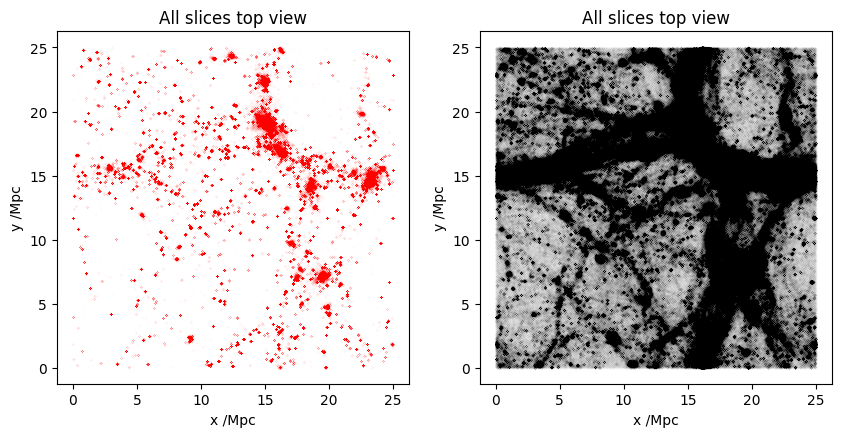

In [5]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
#ax2 = fig.add_subplot(1,2,2, projection ='3d')
ax1.scatter(pos_s[:,0] , pos_s[:,1], marker='o', s=0.0005,alpha=0.5,c='r')
# ax1.set_xlim(16,17)
# ax1.set_ylim(15,16)
ax1.set_xlabel('x /Mpc')
ax1.set_ylabel('y /Mpc')
ax1.set_title('All slices top view')
ax1.set_box_aspect(1)
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(pos_dm[:,0] , pos_dm[:,1], marker='o', s=0.00003,alpha=0.5,c='k')
ax2.set_xlabel('x /Mpc')
ax2.set_ylabel('y /Mpc')
ax2.set_title('All slices top view')
ax2.set_box_aspect(1)

### Slicing 

In [5]:
def slicer(array, num_slices=15, mass_array=None, mass=False):
    '''Slices positions of particles in a box along the z axis
    array has shape (N,3)
    (if mass=True we also slice the mass of the particle with index corresponding to index in position array)
    Returns a dictionary (or two) with each section containing positions of that slice'''
    box_length = 25.0  # Length of the 3D box
    pos_index = 0
    slice_size = box_length / num_slices  # Size of each slice along the z-axis
    # Initialize an empty dictionary to store the particle positions for each slice
    sliced_positions = {}
    sliced_masses = {}
    # Initialize the dictionary with empty arrays for each slice
    for i in range(num_slices):
        sliced_positions[i] = []
        if mass == True:
            sliced_masses[i] = []
    # Iterate over each particle position
    for position in array:
        # Calculate the index of the slice based on the z-coordinate
        slice_index = int(position[2] // slice_size)

        # Append the position to the corresponding slice's array
        sliced_positions[slice_index].append(position)
        if mass==True:
            sliced_masses[slice_index].append(mass_array[pos_index])
            pos_index +=1

    # Convert the lists to numpy arrays
    for slice_index in sliced_positions:
        sliced_positions[slice_index] = np.array(sliced_positions[slice_index])
        if mass==True: 
            sliced_masses[slice_index] = np.array(sliced_masses[slice_index])
    # Print the positions for each slice
    for slice_index in sliced_positions:
        print(f"Slice {slice_index} shape: ", sliced_positions[slice_index].shape)
    return sliced_positions, sliced_masses

In [6]:
sliced_dm, d = slicer(pos_dm, num_slices=15)
sliced_s, sliced_s_den = slicer(pos_s, num_slices=15, mass_array=dens_s, mass=True)

Slice 0 shape:  (1209864, 3)
Slice 1 shape:  (492697, 3)
Slice 2 shape:  (452736, 3)
Slice 3 shape:  (430745, 3)
Slice 4 shape:  (560131, 3)
Slice 5 shape:  (702403, 3)
Slice 6 shape:  (1397609, 3)
Slice 7 shape:  (503754, 3)
Slice 8 shape:  (883426, 3)
Slice 9 shape:  (1019243, 3)
Slice 10 shape:  (1100612, 3)
Slice 11 shape:  (1005575, 3)
Slice 12 shape:  (1222618, 3)
Slice 13 shape:  (4013537, 3)
Slice 14 shape:  (1782266, 3)
Slice 0 shape:  (118601, 3)
Slice 1 shape:  (20139, 3)
Slice 2 shape:  (23228, 3)
Slice 3 shape:  (20018, 3)
Slice 4 shape:  (35715, 3)
Slice 5 shape:  (44831, 3)
Slice 6 shape:  (196453, 3)
Slice 7 shape:  (20407, 3)
Slice 8 shape:  (63485, 3)
Slice 9 shape:  (72071, 3)
Slice 10 shape:  (115227, 3)
Slice 11 shape:  (83799, 3)
Slice 12 shape:  (106591, 3)
Slice 13 shape:  (553119, 3)
Slice 14 shape:  (188358, 3)


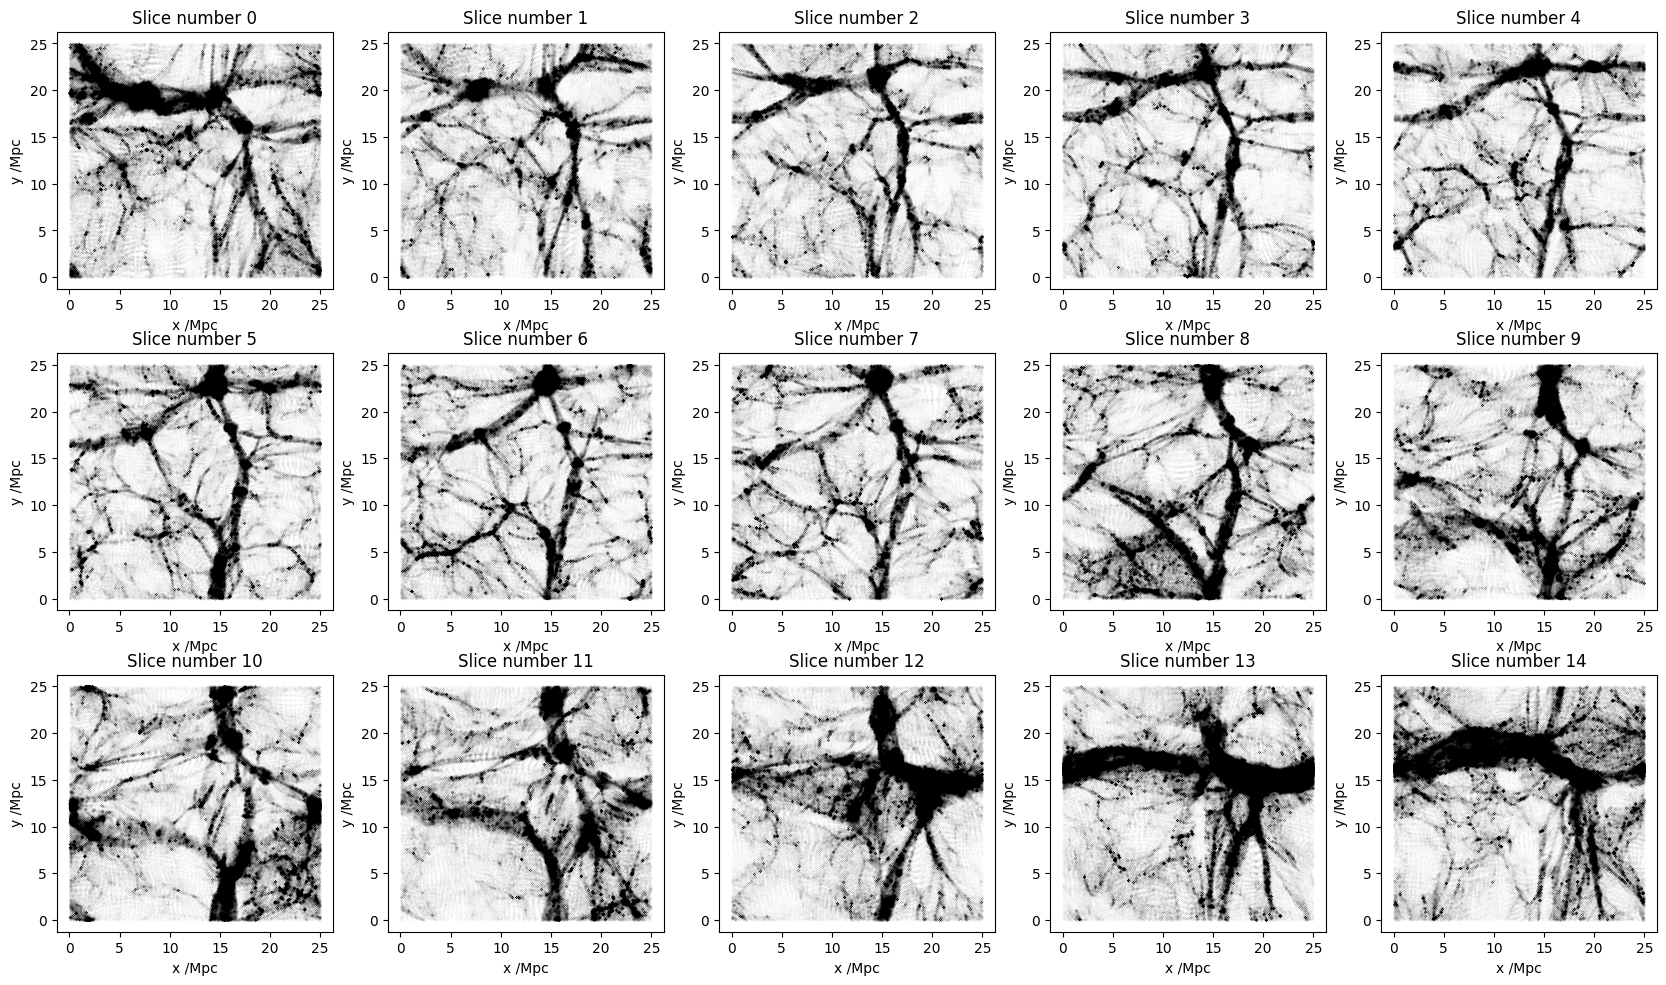

In [39]:
fig = plt.figure(figsize=(16,9))
for i in range(15):
    ax = fig.add_subplot(3,5,i+1)
    im= ax.scatter(sliced_dm[i][:,1] , sliced_dm[i][:,0], marker='o', s=0.0005, alpha=0.5,c='k')
    ax.set_xlabel('x /Mpc')
    ax.set_ylabel('y /Mpc')
    ax.set_title(f'Slice number {i}')

fig.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, 
                        wspace=0.2, 
                        hspace=0.25)

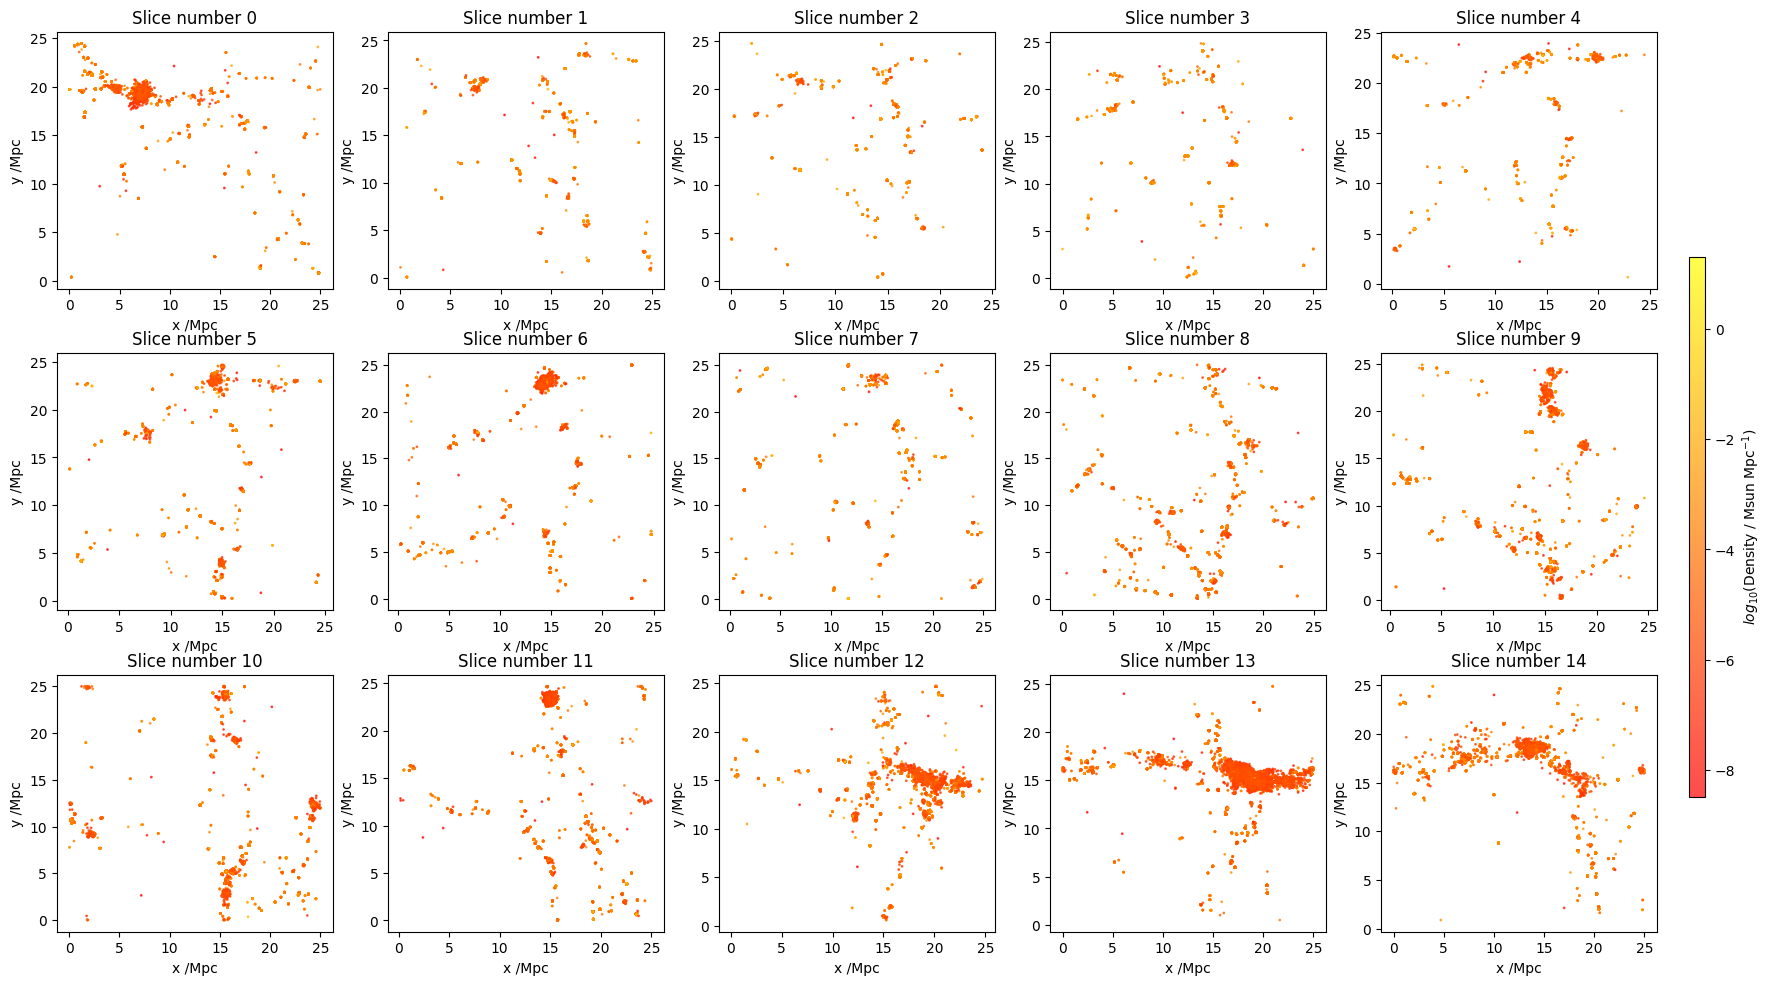

In [7]:
fig = plt.figure(figsize=(16,9))
cbar_ax = fig.add_axes([1.02, 0.15, 0.01, 0.6])  # Define position of the colorbar
for i in range(15):
    ax = fig.add_subplot(3,5,i+1)
    im= ax.scatter(sliced_s[i][:,1] , sliced_s[i][:,0], c=np.log10(sliced_s_den[i]), marker='o', s=1, alpha=0.7,cmap='autumn')
    ax.set_xlabel('x /Mpc')
    ax.set_ylabel('y /Mpc')
    ax.set_title(f'Slice number {i}')

cbar = fig.colorbar(im, cax=cbar_ax)  # Use the predefined colorbar axes
cbar.set_label(r'$log_{10}$(Density / Msun Mpc$^{-1}$)')
fig.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, 
                        wspace=0.2, 
                        hspace=0.25)

(-1.249789651560397, 26.24996820528778)

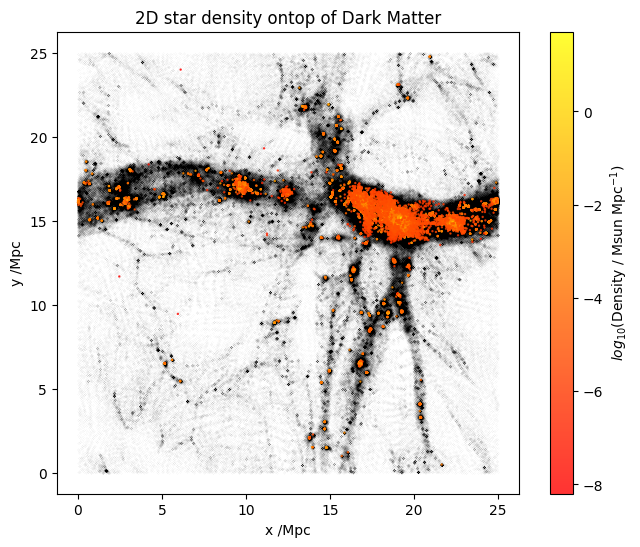

In [10]:
_slice_ = 13
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(sliced_dm[_slice_][:,1] , sliced_dm[_slice_][:,0], marker='o', s=0.0005, alpha=0.5,c='k')
im= ax.scatter(sliced_s[_slice_][:,1] , sliced_s[_slice_][:,0], c=np.log10(sliced_s_den[_slice_]),
               marker='o', s=0.5, alpha=0.8,cmap='autumn')
cbar=plt.colorbar(im, ax=ax)
cbar.set_label(r'$log_{10}$(Density / Msun Mpc$^{-1}$)')
ax.set_xlabel('x /Mpc')
ax.set_ylabel('y /Mpc')
ax.set_title(f'2D star density ontop of Dark Matter')
ax.set_box_aspect(1)
ax.set_xlim(None,None)
ax.set_ylim(None,None)

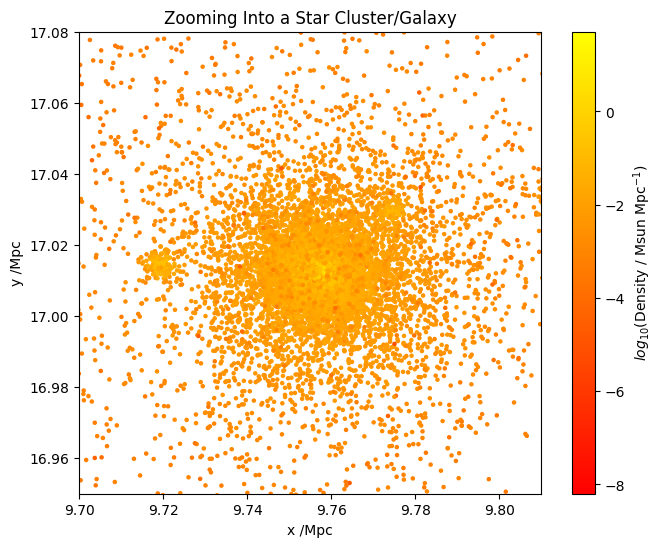

In [53]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
im= ax.scatter(sliced_s[_slice_][:,1] , sliced_s[_slice_][:,0], c=np.log10(sliced_s_den[_slice_]),
               marker='o', s=5, alpha=1,cmap='autumn')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(r'$log_{10}$(Density / Msun Mpc$^{-1}$)')
ax.set_xlabel('x /Mpc')
ax.set_ylabel('y /Mpc')
ax.set_title(f'Zooming Into a Star Cluster/Galaxy')
ax.set_box_aspect(1)
ax.set_xlim(9.70,9.81)
ax.set_ylim(16.95,17.08)
plt.show()

In [20]:
from matplotlib import colors 

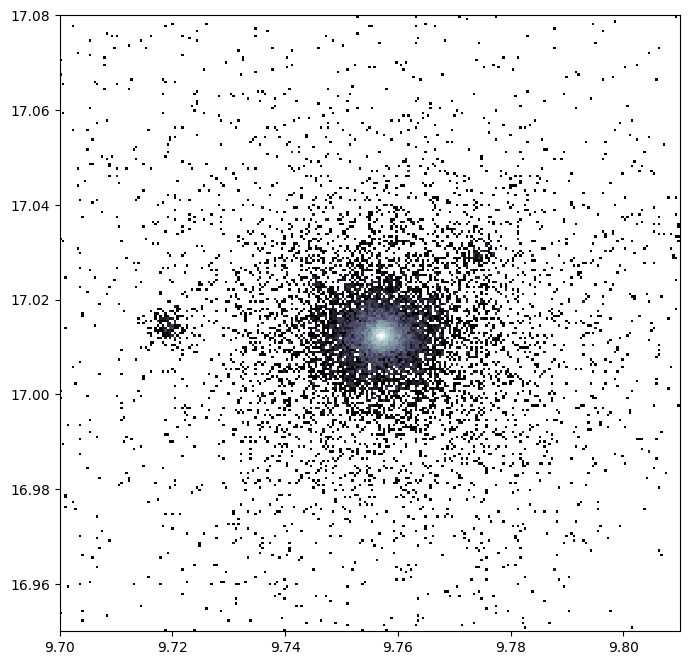

In [26]:
fig = plt.figure(figsize=(8,8))

plt.hist2d(sliced_s[_slice_][:,1] , sliced_s[_slice_][:,0],cmap='bone',norm=colors.LogNorm(),
           bins=(np.linspace(9.70,9.81,256),np.linspace(16.95,17.08,256)))

#c.set_label(r'$log_{10}$(Density / Msun Mpc$^{-1}$)')
#ax.set_xlabel('x /Mpc')
#ax.set_ylabel('y /Mpc')
#ax.set_title(f'Zooming Into a Star Cluster/Galaxy')
#ax.set_box_aspect(1)
#ax.set_xlim(9.70,9.81)
#ax.set_ylim(16.95,17.08)

plt.show()